In [93]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import cartopy.crs as ccrs
import cartopy
import xarray as xr
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [94]:
work_dir=Path("/mnt/u/LSM root zone/global_sr")
work_dir2=Path('/mnt/c/Users/fransjevanoors/surfdrive - Fransje van Oorschot@surfdrive.surf.nl/Fransje/')

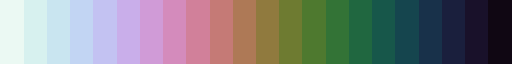

In [105]:
cmap = cm.get_cmap('cubehelix_r', 24)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
cmap_sr = ListedColormap(color_list[1:-1])
cmap_sr.set_over(color_list[-1])
cmap_sr.set_under(color_list[0])
# cmap_sr.set_bad('whitesmoke')
cmap_sr

In [78]:
st = xr.open_dataset(f'{work_dir2}/HTESSEL/grib_conversion_soil_map/SLT_in.nc')
# st.SLT
st['lon'] = xr.where(st['lon'] > 180, st['lon'] - 360, st['lon'])
st = st.sortby('lon')
st

<xarray.Dataset>
Dimensions:  (time: 1, lon: 512, lat: 256)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01
  * lon      (lon) float64 -179.3 -178.6 -177.9 -177.2 ... 178.6 179.3 180.0
  * lat      (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
Data variables:
    SLT      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Sep 15 09:16:22 2020: cdo -t ecmwf -R -f nc selname,SLT...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_lin

Text(0.5, 1.0, 'soil type HTESSEL')

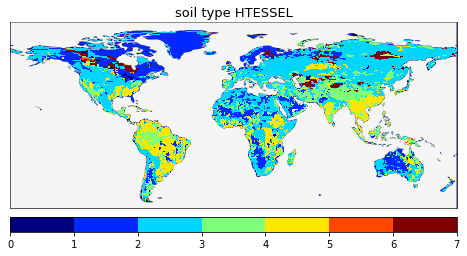

In [79]:
# sr predicted mean
bounds = np.linspace(0,7,8)
bounds2 = np.linspace(0,7,8)
norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= st.SLT[0].plot(ax=ax,levels=bounds, add_colorbar=False,cmap='jet')
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='',size=10)
ax.set_title('soil type HTESSEL',size=13)

Text(0.5, 1.0, 'Soil types HTESSEL')

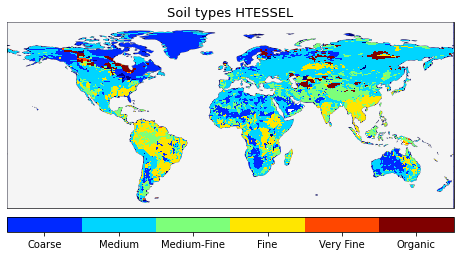

In [83]:
# htessel soil types
bounds = np.linspace(1,7,7)
bounds2 = np.linspace(1,7,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= st.SLT[0].plot(ax=ax,levels=bounds, add_colorbar=False,cmap='jet')
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02,aspect=30)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='',size=10)
cbar.set_ticks([1.5,2.5,3.5,4.5,5.5,6.5])
cbar.set_ticklabels(['Coarse','Medium','Medium-Fine','Fine','Very Fine','Organic'])
ax.set_title('Soil types HTESSEL',size=13)

In [ ]:
# htessel soil types
bounds = np.linspace(1,7,7)
bounds2 = np.linspace(1,7,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= st.SLT[0].plot(ax=ax,levels=bounds, add_colorbar=False,cmap='jet')
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02,aspect=30)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='',size=10)
cbar.set_ticks([1.5,2.5,3.5,4.5,5.5,6.5])
cbar.set_ticklabels(['Coarse','Medium','Medium-Fine','Fine','Very Fine','Organic'])
ax.set_title('Soil types HTESSEL',size=13)

In [109]:
st = xr.open_dataset(f'{work_dir2}/HTESSEL/grib_conversion_soil_map/SLT_in.nc')
# st.SLT
st['lon'] = xr.where(st['lon'] > 180, st['lon'] - 360, st['lon'])
st = st.sortby('lon')

s1 = 0.185 * 2890
s2 = 0.196 * 2890
s3 = 0.251 * 2890
s4 = 0.170 * 2890
s5 = 0.207 * 2890
s6 = 0.396 * 2890
s7 = 0.151 * 2890
st['SLT'] = xr.where(st['SLT'] == 1, s1, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 2, s2, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 3, s3, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 4, s4, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 5, s5, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 6, s6, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 7, s7, st['SLT'])
print(s1,s2,s3,s4,s5,s6,s7)

534.65 566.44 725.39 491.3 598.23 1144.44 436.39


Text(0.5, 1.0, 'soil type HTESSEL')

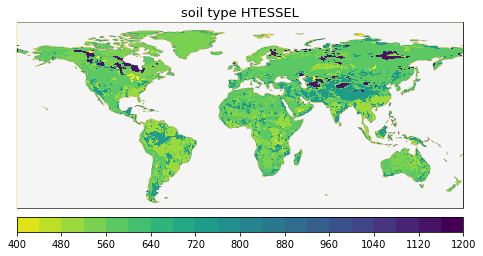

In [89]:
# sr predicted mean
bounds = np.linspace(400,1200,21)
bounds2 = np.linspace(400,1200,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= st.SLT[0].plot(ax=ax,levels=bounds, add_colorbar=False,cmap='viridis_r')
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='',size=10)
ax.set_title('soil type HTESSEL',size=13)

Text(0.5, 1.0, 'soil type HTESSEL')

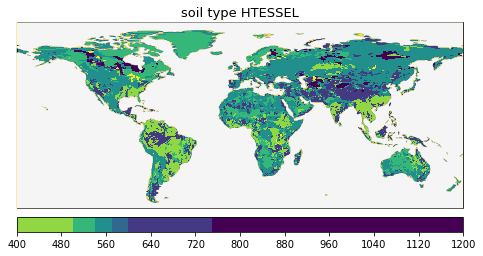

In [91]:
# sr predicted mean
bounds = [400,500,540,570,600,750,1200]
# bounds2 = np.linspace(400,1200,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= st.SLT[0].plot(ax=ax,levels=bounds, add_colorbar=False,cmap='viridis_r')
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='',size=10)
ax.set_title('soil type HTESSEL',size=13)

In [116]:
# output from IAKV experiment
s = xr.open_dataset(f'/mnt/u/LSM root zone/o_soil_1999_2018_monthly.nc')
s['lon'] = xr.where(s['lon'] > 180, s['lon'] - 360, s['lon'])
s = s.sortby('lon')

# convert to mm for each layer
s1 = s.SWVL1 * 70
s2 = s.SWVL2 * 210
s3 = s.SWVL3 * 720
s4 = s.SWVL4 * 1890

# sum four layers sm
ss = s1+s2+s3+s4

In [158]:
# for each year max - min
ps = []
for i in range(20):
    y = ss[(12*(i)):(12*(i+1))]
    mx = y.max(dim='time')
    mn = y.min(dim='time')
    m = mx - mn
    ps.append(m)

# for all years: max (max-min)
pss = xr.concat(ps, dim='z')
pss = pss.max(dim='z')

/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_lin

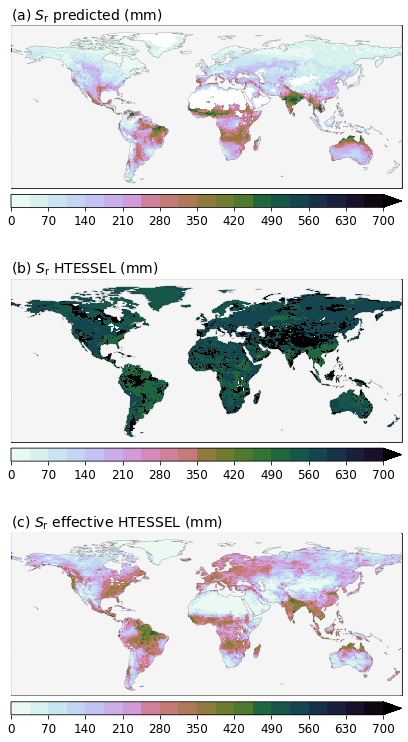

In [180]:
# sr predicted mean
p = xr.open_dataset(f'{work_dir}/output/gridded_sr/data_xr_mean.nc')

bounds = np.linspace(0,700,21)
bounds2 = np.linspace(0,700,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

fig2 = plt.figure(figsize=(7,21))
ax = fig2.add_subplot(311,projection=ccrs.PlateCarree())
plt.subplots_adjust(hspace=-0.6)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = p.sr_p.plot(ax=ax, cmap=cmap_sr,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.01,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='',size=12)
ax.set_title('')
ax.set_title('(a) $S_\mathrm{r}$ predicted (mm)',size=14,loc='left')

# HTESSEL based on soiltypes
# bounds = np.linspace(0,500,21)
# bounds2 = np.linspace(0,500,11)
# norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

ax = fig2.add_subplot(312,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= st.SLT[0].plot(ax=ax,levels=bounds, add_colorbar=False,cmap=cmap_sr)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.01,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='',size=12)
ax.set_title('')
ax.set_title('(b) $S_\mathrm{r}$ HTESSEL (mm)',size=14,loc='left')

# HTESSEL based on soiltypes
# bounds = np.linspace(0,500,21)
# bounds2 = np.linspace(0,500,11)
# norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

ax = fig2.add_subplot(313,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= pss.plot(ax=ax,levels=bounds, add_colorbar=False,cmap=cmap_sr)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.01,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='',size=12)
ax.set_title('')
ax.set_title('(c) $S_\mathrm{r}$ effective HTESSEL (mm)',size=14,loc='left')

fig2.savefig(f'{work_dir2}/phd_thesis/sr_comparison_conclusions.jpg',bbox_inches='tight',dpi=600)
